In [33]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 6)

The dataset we are using for the final project contains the registered evictions performed in New York City from 2017 until today. The motivation behind the decision to analyze evictions lies in our excitement to dive into social phenonemena and explain or illustrate their chronological development and their dependence on other factors. In our case, examining the reported evictions in a large-scale city as that of New York, could enlighten our knowledge on other relevant social matters such as the distribution of the economic wealth, the poverty levels of the population and the fluctuation in rent prices over the years. The decision on selecting the specific dataset is due to the fact that it can be inextricably linked and give an overview of the latent economic situation in a metropolitan area and give indicates for future analysis. Our goal is to give the end user the opportunity to explore these correlations and get a better understanding on the level of dependence of the attributes through interactive plots. The dataset can be found in the [New York opendata website.](https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4)

In [2]:
df = pd.read_csv('Evictions.csv')
df.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,48174/18,349487,1238 BOYNTON AVENUE,1R,03/08/2019,Thomas,Bia,Residential,BRONX,10472,Not an Ejectment,Possession,40.829759,-73.878482,9.0,18.0,54.0,2025234.0,2.037740e+09,West Farms-Bronx River
1,B35706/18,108013,3235 GRAND CONCOURSE,6C,10/03/2018,Darlene,Barone,Residential,BRONX,10468,Not an Ejectment,Possession,40.877488,-73.885258,7.0,11.0,411.0,2017667.0,2.033230e+09,Bedford Park-Fordham North
2,55095/17,10840,640 E 86TH STREET,NaN,07/25/2017,Edward,Guida,Residential,BROOKLYN,11236,Not an Ejectment,Possession,40.640733,-73.911547,18.0,46.0,958.0,3223963.0,3.079900e+09,Canarsie
3,Q72651/16,75106,148-41 236 STREET,NaN,03/31/2017,Ileana,Rivera,Residential,QUEENS,11422,Not an Ejectment,Possession,40.653782,-73.747053,13.0,31.0,694.0,4443919.0,4.137360e+09,Springfield Gardens South-Brookville
4,64094/17,11817,38-32 29TH STREET,1,08/16/2017,Edward,Guida,Residential,QUEENS,11101,Not an Ejectment,Possession,40.754198,-73.933916,1.0,26.0,31.0,4004669.0,4.003850e+09,Queensbridge-Ravenswood-Long Island City


The dataset spans over 70.000 records of evictions that have been performed since 2017. Out of the total 20 features, a first skim of the dataset reveals that the most suitable attributes for the analysis that could be extracted is the date of the eviction, the geographical location, the postalcode, the borough, the category and the mashal who performed it. 

Concerning data cleaning and preprocessing, it is worth mentioning that the dataset was inspected for missing values and it was decided to exclude the recorded evictions from which their geographical location (longitude, latitude) or the Neighborhood Tabulation Area (NTA) values were missing.

In [3]:
df = df.dropna(subset=['NTA'])
df = df.drop(columns=['Eviction Apartment Number','BIN','BBL'])
df.isnull().sum()

Court Index Number           0
Docket Number                0
Eviction Address             0
Executed Date                0
Marshal First Name           0
Marshal Last Name            0
Residential/Commercial       0
BOROUGH                      0
Eviction Postcode            0
Ejectment                    0
Eviction/Legal Possession    0
Latitude                     0
Longitude                    0
Community Board              0
Council District             0
Census Tract                 0
NTA                          0
dtype: int64

In [4]:
df['Executed Date'] = pd.to_datetime(df['Executed Date'])
df['year'] = df['Executed Date'].dt.year

In [5]:
df.head()

,Court Index Number,Docket Number,Eviction Address,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,year
0,48174/18,349487,1238 BOYNTON AVENUE,2019-03-08,Thomas,Bia,Residential,BRONX,10472,Not an Ejectment,Possession,40.829759,-73.878482,9.0,18.0,54.0,West Farms-Bronx River,2019
1,B35706/18,108013,3235 GRAND CONCOURSE,2018-10-03,Darlene,Barone,Residential,BRONX,10468,Not an Ejectment,Possession,40.877488,-73.885258,7.0,11.0,411.0,Bedford Park-Fordham North,2018
2,55095/17,10840,640 E 86TH STREET,2017-07-25,Edward,Guida,Residential,BROOKLYN,11236,Not an Ejectment,Possession,40.640733,-73.911547,18.0,46.0,958.0,Canarsie,2017
3,Q72651/16,75106,148-41 236 STREET,2017-03-31,Ileana,Rivera,Residential,QUEENS,11422,Not an Ejectment,Possession,40.653782,-73.747053,13.0,31.0,694.0,Springfield Gardens South-Brookville,2017
4,64094/17,11817,38-32 29TH STREET,2017-08-16,Edward,Guida,Residential,QUEENS,11101,Not an Ejectment,Possession,40.754198,-73.933916,1.0,26.0,31.0,Queensbridge-Ravenswood-Long Island City,2017


In [6]:
# REMOVE LONGITUDE AND LATITUDE OUTSIDE GREATER NEW YORK AREA
minlong = -79.7624
minlat =  40.4772
maxlong = -71.7517
maxlat =  45.0153

masklong = ((df['Longitude'] >= minlong) & (df['Longitude'] <= maxlong)) & ((df['Longitude'] >= minlong) & (df['Longitude'] <= maxlong))
df_ = (df.loc[masklong])


masklat = ((df_['Latitude'] >= minlat) & (df_['Latitude'] <= maxlat)) & ((df_['Latitude'] >= minlat) & (df_['Latitude'] <= maxlat))
df= (df_.loc[masklat])

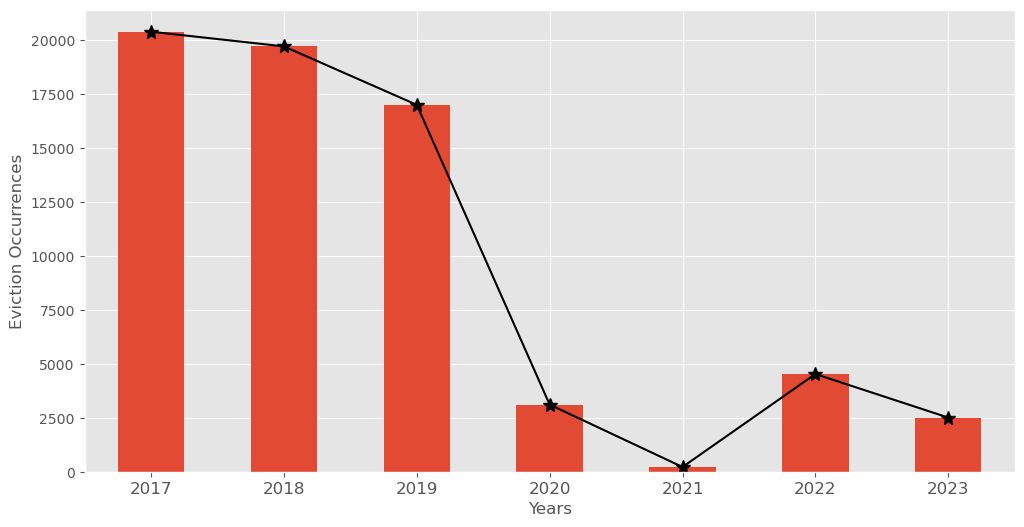

In [7]:
x_axiss = [df.groupby(['year'])['year'].count().iloc[0], df.groupby(['year'])['year'].count().iloc[1], df.groupby(['year'])['year'].count().iloc[2], df.groupby(['year'])['year'].count().iloc[3], df.groupby(['year'])['year'].count().iloc[4], df.groupby(['year'])['year'].count().iloc[5], df.groupby(['year'])['year'].count().iloc[6]]
df.groupby(['year'])['year'].count().plot.bar(x='year', y='years')
plt.plot(x_axiss, marker='*', color='black', ms=10)
plt.xlabel('Years')
plt.ylabel('Eviction Occurrences')
plt.xticks(rotation=0, size=12)
plt.show()

The first plotted histogram depicts the distribution of the number of evictions in the examined period and with a first glimpse, it can easily become evident that COVID-19 has affected dramatically the occurrences. Based on this, a targeted research on articles concerning the Covid period with the performed evictions followed, only to find out, that it was a governmental decision to freeze planned evictions for tenants who had financial problems during that period.

In [8]:
#df.groupby(['month'])['month'].count().plot.bar(x='month', y='months')
#plt.xlabel('months')
#plt.ylabel('Eviction Occurrences')
#plt.xticks(rotation=0)
#plt.show()

In [9]:
#df.groupby(['day'])['day'].count().plot.bar(x='day', y='days')
#plt.xlabel('days')
#plt.ylabel('Eviction Occurrences')
#plt.xticks(rotation=0)
#plt.show()

In [34]:
#df.groupby(['Residential/Commercial'])['Residential/Commercial'].count().plot.pie(autopct='%1.1f%%',subplots=True)
#plt.xlabel('Properties')
#plt.ylabel('Eviction Occurrences')
#plt.xticks(rotation=0)
#plt.show()

In [11]:
df["Full Name"] = df['Marshal First Name']+" "+ df["Marshal Last Name"]

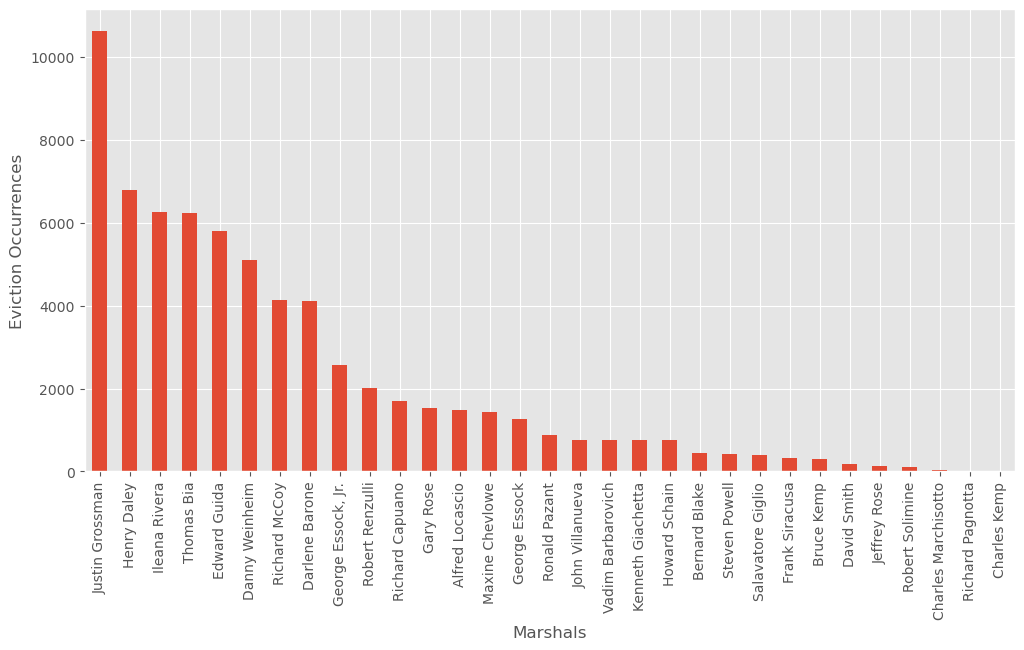

In [12]:
df.groupby("Full Name")['Full Name'].count().sort_values( ascending=False).plot.bar(y='marshals', x='Full Name')
plt.xlabel('Marshals')
plt.ylabel('Eviction Occurrences')
plt.show()

Another interesting information that we derived from the initial dataset is the list of marshals who performed the evictions over the years. The information someone could obtain from this plot is that there is a relatively small number of officers specializing in evictions for such a big city as New York while it is even more interesting to see that a specific police marshal has been in charge for performing most of them.

In [13]:
df_count = df.groupby(['Full Name','year'])['year'].count().reset_index(name='counts')

In [14]:
df_count

,Full Name,year,counts
0,Alfred Locascio,2017,449
1,Alfred Locascio,2018,465
2,Alfred Locascio,2019,334
3,Alfred Locascio,2020,73
4,Alfred Locascio,2021,6
...,...,...,...
154,Thomas Bia,2022,352
155,Thomas Bia,2023,240
156,Vadim Barbarovich,2017,185
157,Vadim Barbarovich,2018,314


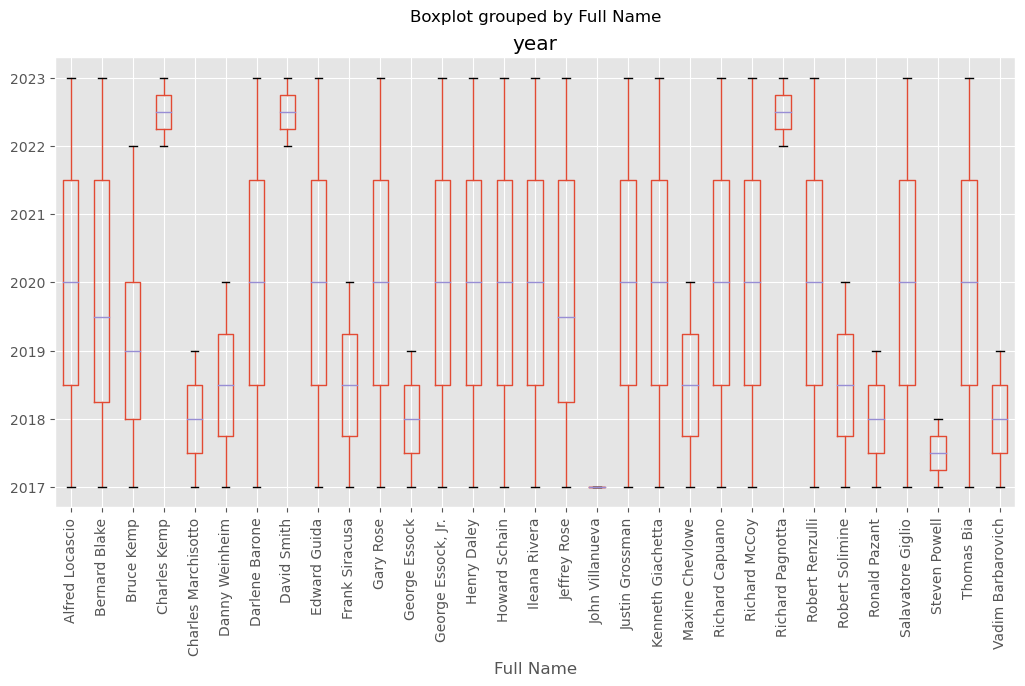

In [15]:
df_count.boxplot(column=['year'], by='Full Name')
plt.xticks(rotation=90);

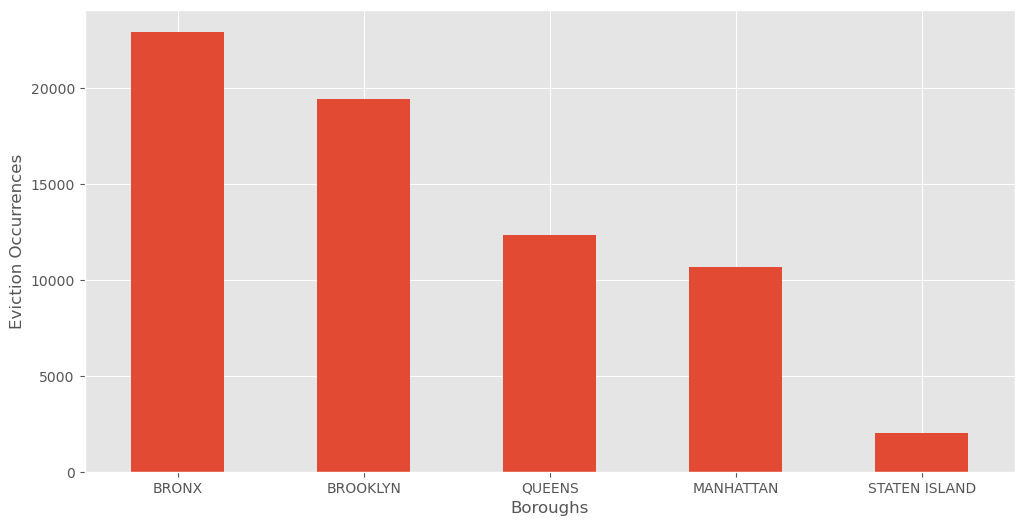

In [35]:
df.groupby("BOROUGH")['BOROUGH'].count().sort_values(ascending=False).plot.bar(y='count_BOROUGH', x='BOROUGH')
plt.xlabel('Boroughs')
plt.ylabel('Eviction Occurrences')
plt.xticks(rotation=0)
plt.show()

At this point, a distribution of the evictions over the boroughs of NEW YORK was plotted in order to get a first view on the hotspot areas. The borough plot reveals that BRONX stands out with the highest number of recorded evictions followed by BROOKLYN. This information would later be enhanced by plotting the Neighborhood Tabulation Areas (NTAs) in an interactive geo map to investigate further which areas could be considered as eviction "hotspots". Even more, we considered appropriate to search for the rental prices and the annual income in the distinct NTA in order to better interpret and elaborate on our analysis.

The last information derived from our initial dataset is an interactive map of the 195 listed neighborhoods (NTAs) and with the occurences of evictions spanned over the years.

4th plot -> interactive maps of NTAs and evictions (last plot on video )

Analyzing the above, it was judged necessary to incorporate more information about the specified area that could justify or interpret the number of evictions in the examined years. Thus, we searched for economic, social, housing and demographic data of our area and we derived them from the American Community survey website. (dataource here)

### Housing Data

In [17]:
hous_17 = pd.read_excel('housing_data/hous_2017_acs5yr_nta.xlsx')
hous_18 = pd.read_excel('housing_data/hous_2018_acs5yr_nta.xlsx')
hous_19 = pd.read_excel('housing_data/hous_2019_acs5yr_nta.xlsx')
hous_20 = pd.read_excel('housing_data/hous_2020_acs5yr_nta.xlsx')
hous_21 = pd.read_excel('housing_data/hous_2021_acs5yr_nta.xlsx')

In [18]:
hous_17['year'] = 2017
hous_18['year'] = 2018
hous_19['year'] = 2019
hous_20['year'] = 2020
hous_21['year'] = 2021

In [19]:
hous17 = hous_17[['year','GeoName','MdGRE']]
hous18 = hous_18[['year','GeogName','MdGRE']]
hous19 = hous_19[['year','GeogName','MdGRE']]
hous20 = hous_20[['year','GeogName','MdGRE']]
hous21 = hous_21[['year','GeogName','MdGRE']]

In [20]:
housing_data = pd.concat([hous17, hous18, hous19, hous20, hous21], axis=0)

In [21]:
housing_data = housing_data.dropna(subset=['MdGRE'])
housing_data.head() 

,year,GeoName,MdGRE,GeogName
0,2017,Allerton-Pelham Gardens,1336.0,NaN
1,2017,Bedford Park-Fordham North,1208.0,NaN
2,2017,Belmont,1114.0,NaN
3,2017,Bronxdale,1117.0,NaN
4,2017,Claremont-Bathgate,822.0,NaN


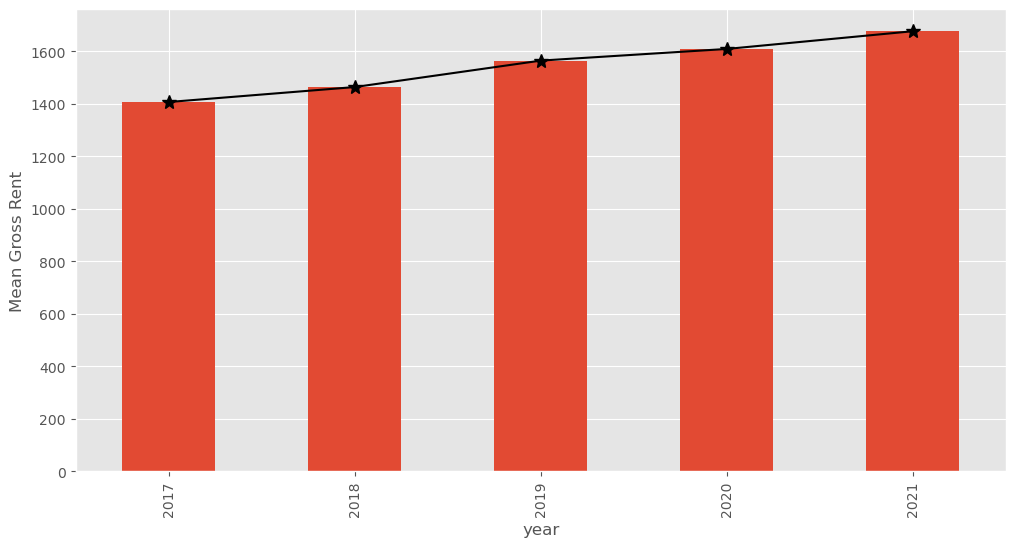

In [22]:
x_axis = [housing_data.groupby(['year'])['MdGRE'].mean().iloc[0], housing_data.groupby(['year'])['MdGRE'].mean().iloc[1], housing_data.groupby(['year'])['MdGRE'].mean().iloc[2], housing_data.groupby(['year'])['MdGRE'].mean().iloc[3], housing_data.groupby(['year'])['MdGRE'].mean().iloc[4]]
housing_data.groupby(['year'])['MdGRE'].mean().plot.bar(y='MdGRE', x='year')
plt.plot(x_axis, marker='*', color='black', ms=10)
plt.ylabel('Mean Gross Rent')
plt.xlabel('year')
plt.show()

In [23]:
#fig, ax = plt.subplots(figsize=(8,6))

#housing_data.groupby(['year'])['MdGRE'].mean().plot(y='mean_MdGRE', x='year')
#ax.set_ylabel('Median Gross Rent')
#ax.set_xticks([2017,2018,2019,2020,2021])
#ax.set_xticklabels(['2017','2018','2019', '2020','2021'])
#plt.show()

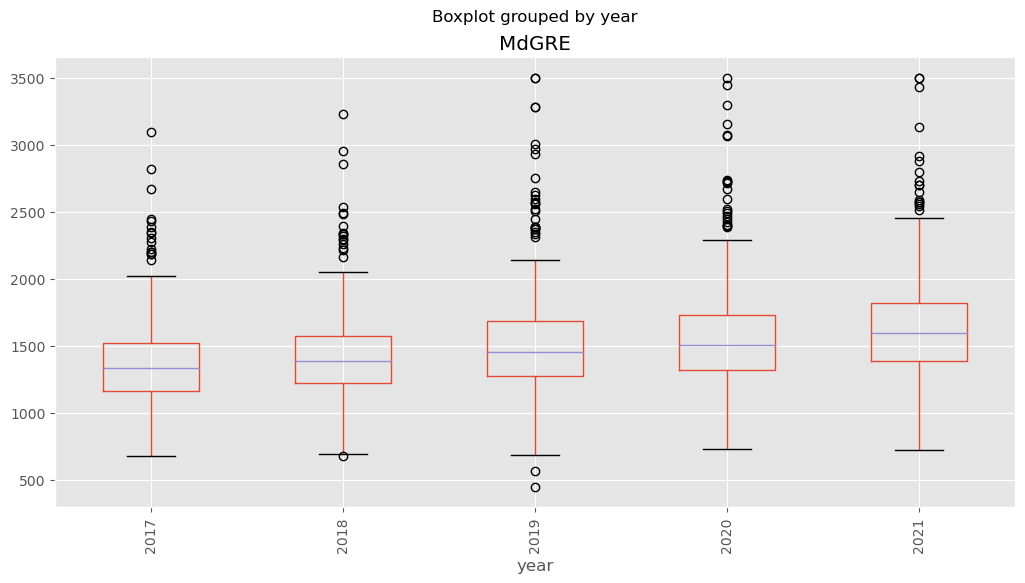

In [24]:
housing_data.boxplot(column=['MdGRE'], by='year')
plt.xticks(rotation=90);

### Economic Data

In [25]:
econ_17 = pd.read_excel('economic_data/econ_2017_acs5yr_nta.xlsx')
econ_18 = pd.read_excel('economic_data/econ_2018_acs5yr_nta.xlsx')
econ_19 = pd.read_excel('economic_data/econ_2019_acs5yr_nta.xlsx')
econ_20 = pd.read_excel('economic_data/econ_2020_acs5yr_nta.xlsx')
econ_21 = pd.read_excel('economic_data/econ_2021_acs5yr_nta.xlsx')

In [26]:
econ_17['year'] = 2017
econ_18['year'] = 2018
econ_19['year'] = 2019
econ_20['year'] = 2020
econ_21['year'] = 2021

In [27]:
econ17 = econ_17[['year','GeoName','MnHHIncE']]
econ18 = econ_18[['year','GeogName','MnHHIncE']]
econ19 = econ_19[['year','GeoName','MnHHIncE']]
econ20 = econ_20[['year','GeoName','MnHHIncE']]
econ21 = econ_21[['year','GeogName','MnHHIncE']]

In [28]:
economic_data = pd.concat([econ17, econ18, econ19, econ20, econ21], axis=0)
economic_data

,year,GeoName,MnHHIncE,GeogName
0,2017,Allerton-Pelham Gardens,81828.0,NaN
1,2017,Bedford Park-Fordham North,47583.0,NaN
2,2017,Belmont,37108.0,NaN
3,2017,Bronxdale,48953.0,NaN
4,2017,Claremont-Bathgate,35232.0,NaN
...,...,...,...,...
257,2021,NaN,NaN,Freshkills Park (North)
258,2021,NaN,NaN,Freshkills Park (South)
259,2021,NaN,NaN,Hoffman & Swinburne Islands
260,2021,NaN,124871.0,Miller Field


In [29]:
economic_data = economic_data.dropna(subset=['MnHHIncE'])
economic_data

,year,GeoName,MnHHIncE,GeogName
0,2017,Allerton-Pelham Gardens,81828.0,NaN
1,2017,Bedford Park-Fordham North,47583.0,NaN
2,2017,Belmont,37108.0,NaN
3,2017,Bronxdale,48953.0,NaN
4,2017,Claremont-Bathgate,35232.0,NaN
...,...,...,...,...
196,2021,NaN,130084.0,Tottenville-Charleston
199,2021,NaN,141223.0,Fort Hamilton
205,2021,NaN,86661.0,Fort Wadsworth
240,2021,NaN,20017.0,Pelham Bay Park


In [30]:
x_axisss = [economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[0], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[1], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[2], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[3], economic_data.groupby(['year'])['MnHHIncE'].mean().iloc[4]]

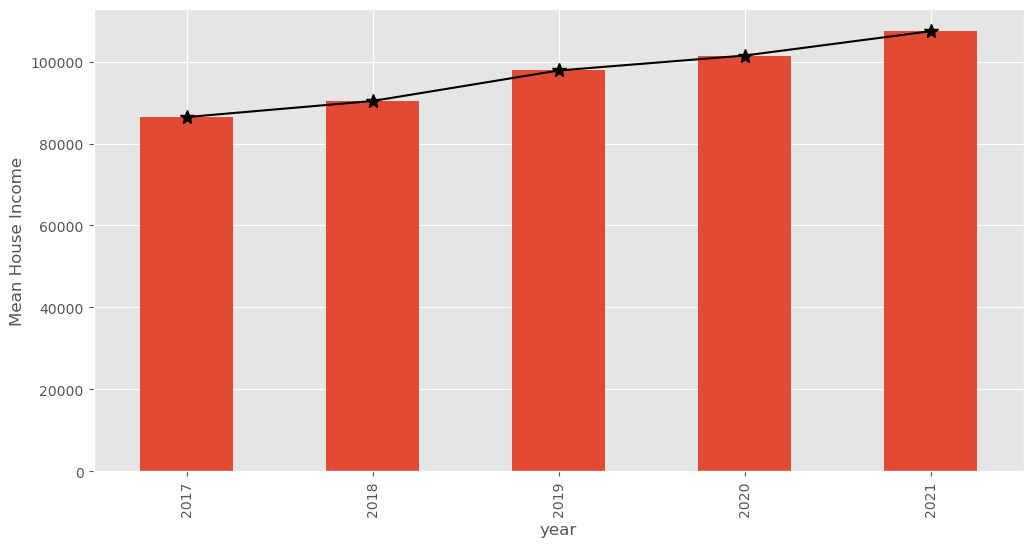

In [31]:
economic_data.groupby(['year'])['MnHHIncE'].mean().plot.bar(y='MnHHIncE', x='year')
plt.plot(x_axisss, marker='*', color='black', ms=10)
plt.ylabel('Mean House Income')
plt.show()

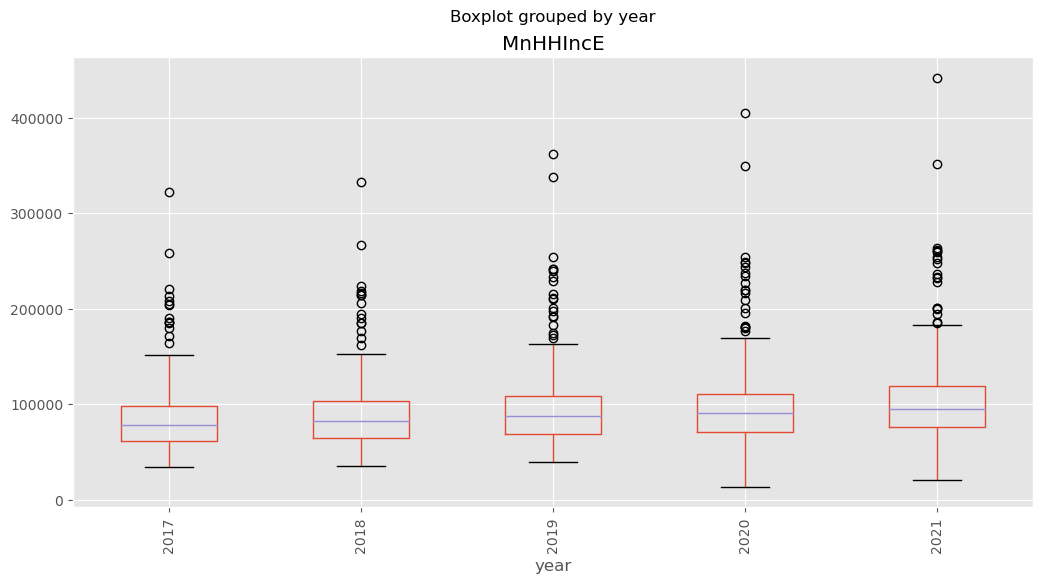

In [32]:
economic_data.boxplot(column=['MnHHIncE'], by='year')
plt.xticks(rotation=90);